Assignment:
We would like to give a you dataset and see how you approach the problem. This is a machine learning problem. If you do not have machine learning background, you can still write scripts to load the data and share with us your insight about the data and how you would approach the problem. Could you work on it and share with us your results in your 9-10 am presentation?

The data are in https://www.dropbox.com/s/ouuxn8nd5qwcs9w/dataset.zip?dl=0

It’s a feature table that contains 34553 samples. The “Class” column is the label. All other columns except for the first three columns (ID, Time, Group) are the features of the samples. The objective is to train a supervised model that takes features of new samples to predict the Class.

1.Any pre-processing of the data we should do before training a model
2.Build a classifier model.
3.Show the model performance, both overall and per class. For example, precision and recall. Show them in tables or plots.
4.Show any insight you uncover.

In [3]:
# import sys
# import scipy
import time
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Read Data. View Data

In [4]:
#Reading the data
df = pd.read_pickle("dataset.pkl")
#View the data
display(df.head())
display(df.tail())
print(df.shape)

,ID,Time,Group,GR1,GR2,GR3,GR4,GR5,GR6,GR7,...,M6,M7,M8,M9,M10,M11,M12,FA1,FA2,Class
0,0,20210901T052203,1,88.0,4000.0,0.788286,0.858421,0.000000,0.000000,0.808354,...,0.770476,3.0,2036.0,-0.128886,0.687892,0.169358,0.857251,0.045817,2.484042,CL146
1,1,20210901T052203,1,177.0,4000.0,0.842848,1.676998,2.689012,2.689012,0.817277,...,80.452591,666.0,2552.0,1.149273,14.546570,13.930302,28.476871,0.101117,3.193393,CL6
2,2,20210901T052203,1,209.0,4000.0,0.986631,1.118038,0.000000,0.000000,0.798937,...,190.957947,103.0,213.0,-5.968551,154.971451,184.861984,339.833435,0.085103,8.746268,CL6
3,3,20210901T052203,1,471.0,4000.0,0.986631,1.000529,0.000000,0.000000,0.826357,...,0.464587,16.0,2576.0,4.431015,6.842685,5.425236,12.267921,0.137593,9.402219,CL187
4,4,20210901T052203,1,363.0,4000.0,0.994236,1.011487,0.000000,2.805979,0.797859,...,192.430420,86.0,131.0,18.884167,273.286896,281.943420,555.230286,0.108135,6.391616,CL6


,ID,Time,Group,GR1,GR2,GR3,GR4,GR5,GR6,GR7,...,M6,M7,M8,M9,M10,M11,M12,FA1,FA2,Class
34548,34548,20211004T071217,1,648.0,4000.0,2.805979,3.251773,4.142682,4.142682,0.774836,...,1010.809998,23.0,58.0,32.712311,207.385666,107.307846,314.693512,0.926241,1.029574,CL6
34549,34549,20211004T071217,1,294.0,4000.0,2.184607,2.785324,2.577457,3.968254,0.820650,...,924.410522,39.0,67.0,12.725172,532.424255,536.369995,1068.794189,0.396886,1.338428,CL6
34550,34550,20211004T071217,1,499.0,4000.0,1.482132,1.759822,2.474641,3.826336,0.757360,...,708.942566,364.0,698.0,-1.737106,45.034176,50.711529,95.745705,0.618247,2.703113,CL6
34551,34551,20211004T071217,1,398.0,4000.0,2.990628,3.041985,3.810092,3.810092,0.671338,...,272.842133,47.0,68.0,-88.921623,474.704529,406.408264,881.112793,0.579295,1.217331,CL6
34552,34552,20211004T071217,1,119.0,4000.0,1.662435,2.029150,2.577457,2.577457,0.771876,...,174.554031,56.0,89.0,-59.562809,399.750183,483.666595,883.416809,0.221086,1.987704,CL6


(34553, 7676)


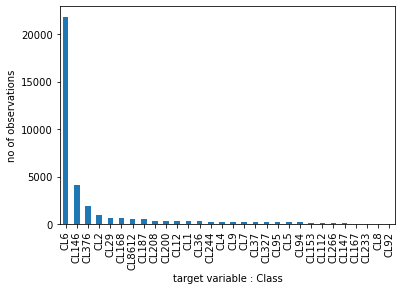

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34553 entries, 0 to 34552
Columns: 7676 entries, ID to Class
dtypes: category(2), float64(7672), int64(1), object(1)
memory usage: 2.0+ GB


In [5]:
#Bar Chart for Class Column
df['Class'].value_counts().plot(kind='bar')
plt.ylabel("no of observations")
plt.xlabel("target variable : Class")
plt.show()
df.info()

In [6]:
#Table For Class Column
df['Class'].value_counts().sort_values(ascending=False)



CL6       21844
CL146      4120
CL376      1842
CL2         903
CL29        646
CL168       593
CL8612      492
CL187       483
CL208       311
CL200       309
CL12        281
CL1         275
CL36        262
CL244       243
CL4         219
CL9         217
CL7         212
CL37        209
CL327       205
CL95        186
CL5         181
CL94        157
CL153       125
CL112        66
CL266        51
CL147        45
CL167        41
CL233        23
CL8          11
CL92          1
Name: Class, dtype: int64

In [7]:
#Total Number of Class
print(df['Class'].unique().value_counts)
print('Total NaN Value',df['Class'].isna().sum())

<bound method Categorical.value_counts of ['CL146', 'CL6', 'CL187', 'CL36', 'CL376', ..., 'CL147', 'CL266', 'CL94', 'CL7', 'CL92']
Length: 30
Categories (30, object): ['CL146', 'CL6', 'CL187', 'CL36', ..., 'CL266', 'CL94', 'CL7', 'CL92']>
Total NaN Value 0


Preprocessing of Data

In [8]:
#Making the working data_set
class_0 = df[df['Class'] == 'CL6'].sample(4000)

class_1 = df[df['Class'] == 'CL146'].sample(4000)

df = pd.concat([class_0, class_1], axis=0)
print(df.shape)

(8000, 7676)


In [9]:
# removing ID columns
id_cols = ["ID", "Time", "Group"]
df = df.drop(id_cols, axis=1)

print(df.shape)

(8000, 7673)


In [10]:
#Dropping Rows/ Cloumn with any NaN
print('Total NaN Before',df.isna().sum().sum())
df = df.dropna(axis=0,how='all').dropna(axis=1,how='all')
print('Total NaN After',df.isna().sum().sum())

Total NaN Before 2289839
Total NaN After 1713839


In [11]:
#Removig all rows that have at least one NaN
#df=df.dropna(axis=0,how='any')  

# Results to output with very few rows. Can't be done

In [12]:
#Filling the NaN Cells with Values
df = df.bfill().ffill()
print(df.shape)
print('Total NaN After',df.isna().sum().sum())

(8000, 7601)
Total NaN After 0


In [13]:
#Giving a Label to the Class Column. Encoding
LE = LabelEncoder()
df["Class"] = LE.fit_transform(df["Class"])

In [14]:
df["Class"].value_counts()

1    4000
0    4000
Name: Class, dtype: int64

In [15]:
#Dividing the data into Feature and Target

X = df.drop("Class", axis=1)
y = df[["Class"]]

In [16]:
# Function for Removing Constant and Quasi-Constant Columns
def variance_threshold_selector(data, threshold):

    selector = VarianceThreshold(threshold)
    selector.fit(data)
    
    return data[data.columns[selector.get_support(indices=True)]]

In [17]:
#Removing Constant & Quasi-Constant Column
X = variance_threshold_selector(X, 0.05)
print(X.shape)

(8000, 5412)


In [18]:
#Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape)

(8000, 5412)


Dimension Reduction

In [19]:
#Principal Component Analysis (PCA) 
pca = PCA(n_components=0.90)
X = pd.DataFrame(pca.fit_transform(X))

print(X.shape)

(8000, 281)


Fitting in Model

In [20]:
#Devide into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

print('x_train row*column',x_train.shape)
print('y_train row*column',y_train.shape)
print('x_test row*column',x_test.shape)
print('y_test row*column',y_test.shape)

x_train row*column (6400, 281)
y_train row*column (6400, 1)
x_test row*column (1600, 281)
y_test row*column (1600, 1)


In [21]:
#Fitting Logistic Regression
model = LogisticRegression(random_state=42)
grid_result = model.fit(x_train, y_train)

C:\Users\shaik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performence Test 

In [22]:
y_pred = grid_result.predict(x_test)

confusion_matrix: 
    0    1
 0 [800   0] 
 1 [  0 800]


C:\Users\shaik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


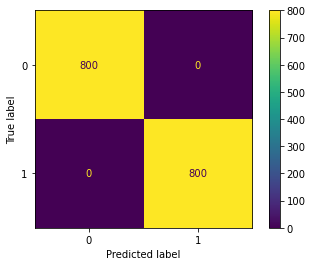

True Negatives =  800
False Negatives =  0
False Positives =  0
True Positives =  800


In [23]:
#confusion_matrix
confusion_matrix_ = confusion_matrix(y_test, y_pred)

print('confusion_matrix: \n    0    1\n 0', confusion_matrix_[0,:],'\n 1',confusion_matrix_[1,:])
plot_confusion_matrix( model,x_test, y_test) 
plt.show()
 


TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)



In [24]:
#See some report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report = pd.DataFrame(class_report).T
display(class_report.iloc[0:2,:])

,precision,recall,f1-score,support
0,1.0,1.0,1.0,800.0
1,1.0,1.0,1.0,800.0
